# Linear Regression Implementation

## Imports

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring data

### Dataset Glossary (Column-wise)
- crim: Per capita crime rate by town.
- zn: Proportion of large residential lots (over 25,000 sq. ft.).
- indus: Proportion of non-retail business acres per town.
- Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
- nox: Concentration of nitrogen oxides in the air.
- rm: Average number of rooms per dwelling.
- age: Proportion of old owner-occupied units built before 1940.
- dis: Weighted distances to Boston employment centers.
- rad: Index of accessibility to radial highways.
- tax: Property tax rate per $10,000.


In [ ]:

df = pd.read_csv("../datasets/housing.csv")
df.head()
df.describe()
df["rm"] = df["rm"].fillna(df["rm"].mean())




In [ ]:

# Correlation matrix
plt.figure(figsize=(12, 8), facecolor='#00038b')
sns.heatmap(df.corr(), annot=True, cmap=sns.dark_palette("#00eaff", as_cmap=True))
plt.title('Correlation Heatmap')


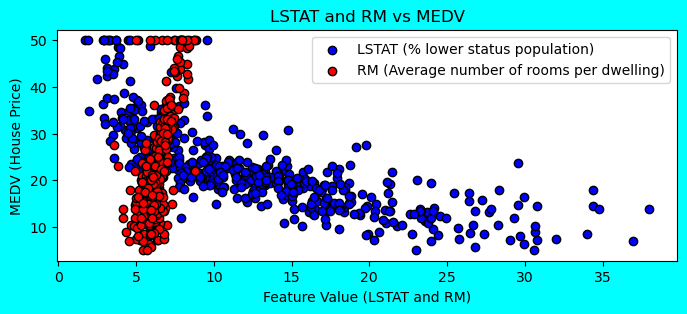

In [ ]:
# Plot both lstat and rm vs medv
plt.figure(figsize=(8, 3) , facecolor='cyan')

# lstat vs medv
plt.scatter(df["lstat"], df["medv"], facecolor="blue", edgecolor="black", label="LSTAT (% lower status population)")

# rm vs medv
plt.scatter(df["rm"], df["medv"], facecolor="red", edgecolor="black", label="RM (Average number of rooms per dwelling)")

# Add labels, title, and legend
plt.xlabel("Feature Value (LSTAT and RM)")
plt.ylabel("MEDV (House Price)")
plt.title("LSTAT and RM vs MEDV")
plt.legend()

## Pre-processing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(["medv"], axis=1)
Y = df["medv"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Implement Linear Regression

In [ ]:
num_features = X_train.shape[1]
weights = np.zeros(num_features)
bias = 0
learning_rate = 0.01
epochs = 1000

# Prediction
def predict(num_features, weights, bias):
    return np.dot(num_features, weights) + bias

# Cost function
def cost_function(actual_values, predicted_values):
    return np.mean((actual_values - predicted_values)**2)


# Gradient descent for minimizing cost function
def gradient_descent(num_features, predicted_values, actual_values, learning_rate, weights, bias):
    n = len(num_features)
    weight_gradient = (-2/ n) * np.dot(num_features.T, (actual_values - predicted_values))
    bias_gradient = (-2 / n) * np.sum(actual_values - predicted_values)
    
    weights = weights - learning_rate * weight_gradient
    bias = bias - learning_rate * bias_gradient
    return weights, bias

## Train the model

In [ ]:
for i in range(epochs):
    
    # Step 1: Make initial predictions
    predicted_values = predict(X_train, weights, bias) 
    
    # Step 2: Calculate cost
    cost = cost_function(Y_train, predicted_values)
    
    # Step 3: Adjust weights and bias to minimize cost using gradient descent
    weights, bias = gradient_descent(X_train, predicted_values, Y_train, learning_rate, weights, bias)
    
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost}")
        

Iteration 0: Cost = 606.5553960396039
Iteration 100: Cost = 32.63461788157655
Iteration 200: Cost = 22.6768475303668
Iteration 300: Cost = 22.18874035024662
Iteration 400: Cost = 22.00937312893546
Iteration 500: Cost = 21.905410100918555
Iteration 600: Cost = 21.840591587682226
Iteration 700: Cost = 21.79811473948483
Iteration 800: Cost = 21.769069614357438
Iteration 900: Cost = 21.7485042664179


## Run the model

In [ ]:
# Step 1: Make final predictions on test data
final_predictions = predict(X_test, weights, bias) 

## Evaluating the model

In [ ]:
def r2_score(Y_test, final_predictions):
    ss_residual = np.sum((Y_test - final_predictions) ** 2)
    ss_total = np.sum((Y_test - np.mean(Y_test)) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def mean_squared_error(Y_test, final_predictions):
    errors = Y_test - final_predictions
    mse = np.mean(errors ** 2)
    return mse

def root_mean_squared_error(Y_test, final_predictions):
    mse = mean_squared_error(Y_test, final_predictions)
    rmse = np.sqrt(mse)
    return rmse

mse = mean_squared_error(Y_test, final_predictions)
rmse = root_mean_squared_error(Y_test, final_predictions)
r2 = r2_score(Y_test, final_predictions)

print(f"MSE: {mse}")
print(f"RMSE: {r2}")



MSE: 24.815871415986955
RMSE: 0.661603829141962


## Improving the model

C:\Users\Infinity\AppData\Local\Temp\ipykernel_12124\240966658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df["medv"], orient="h", palette="coolwarm")


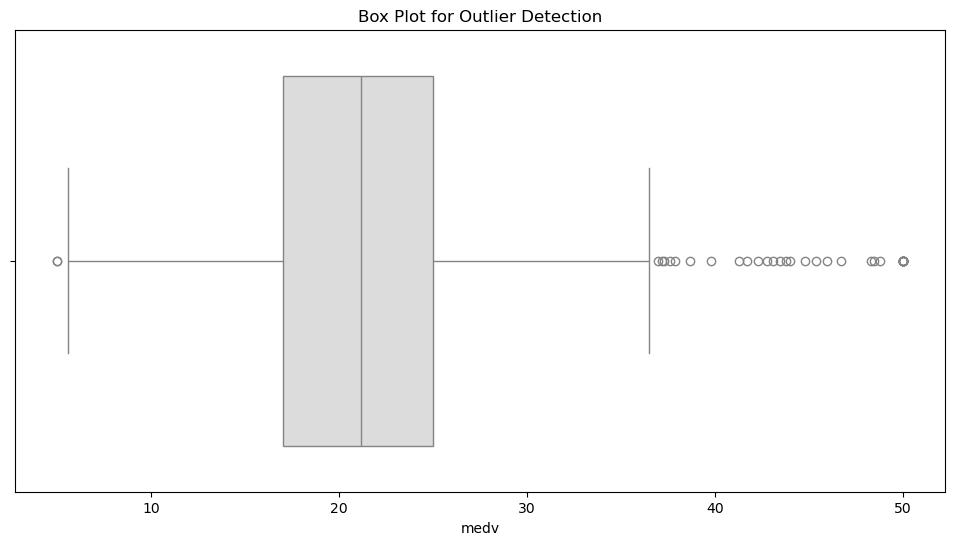

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df["medv"], orient="h", palette="coolwarm")
plt.title("Box Plot for Outlier Detection")
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outliers:", outliers.sum())

Number of outliers: 238


In [ ]:
# Removing outliers using IQR
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)  # First quartile
    Q3 = data[column_name].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                          # Interquartile range
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

# Example: Remove outliers in the "rm" column
df = remove_outliers_iqr(df, "medv")


## Train the model again

In [ ]:
for i in range(epochs):
    
    # Step 1: Make initial predictions
    predicted_values = predict(X_train, weights, bias) 
    
    # Step 2: Calculate cost
    cost = cost_function(Y_train, predicted_values)
    
    # Step 3: Adjust weights and bias to minimize cost using gradient descent
    weights, bias = gradient_descent(X_train, predicted_values, Y_train, learning_rate, weights, bias)
    
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost}")

Iteration 0: Cost = 21.733544025881567
Iteration 100: Cost = 21.72244175691992
Iteration 200: Cost = 21.714084711141947
Iteration 300: Cost = 21.707731939788303
Iteration 400: Cost = 21.702870406717825
Iteration 500: Cost = 21.699133370761384
Iteration 600: Cost = 21.696252169763284
Iteration 700: Cost = 21.694026431695267
Iteration 800: Cost = 21.69230481209679
Iteration 900: Cost = 21.69097199637874


In [ ]:
# Step 1: Make final predictions on test data
final_predictions = predict(X_test, weights, bias) 

In [ ]:
mse = mean_squared_error(Y_test, final_predictions)
rmse = root_mean_squared_error(Y_test, final_predictions)
r2 = r2_score(Y_test, final_predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

MSE: 24.50037242825199
RMSE: 4.949785089097504
R^2 Score: 0.6659060616757073


In [ ]:

print(X_test[:1])

[[-0.39680933 -0.50032012 -1.00711147 -0.27808871 -0.39541229  0.14019071
   0.55591643 -0.54585271 -0.50779731 -0.65092617 -0.77195078  0.42887165
  -0.48121032]]


In [ ]:
# Assuming you've already trained your model and have weights and bias

# Select a single row from your dataset
single_sample =[-0.39680933, -0.50032012, -1.00711147, -0.27808871, -0.39541229,  0.14019071,
   0.55591643, -0.54585271, -0.50779731, -0.65092617, -0.77195078,  0.42887165,
  -0.48121032]
   # First row of entire dataset

# Ensure the sample is a numpy array
# single_sample_array = single_sample.values.reshape(1, -1)  # Reshape to 2D array

# Use your existing predict function
print(f"Prtediction: {predict(single_sample, weights, bias)}") 


# Print the actual vs predicted value
print("Single Sample Features:", single_sample)

print("Actual Value:", Y_test[:1])  # Assuming you want to compare with the actual value

Prtediction: 28.989941403888125
Single Sample Features: [-0.39680933, -0.50032012, -1.00711147, -0.27808871, -0.39541229, 0.14019071, 0.55591643, -0.54585271, -0.50779731, -0.65092617, -0.77195078, 0.42887165, -0.48121032]
Actual Value: 173    23.6
Name: medv, dtype: float64
